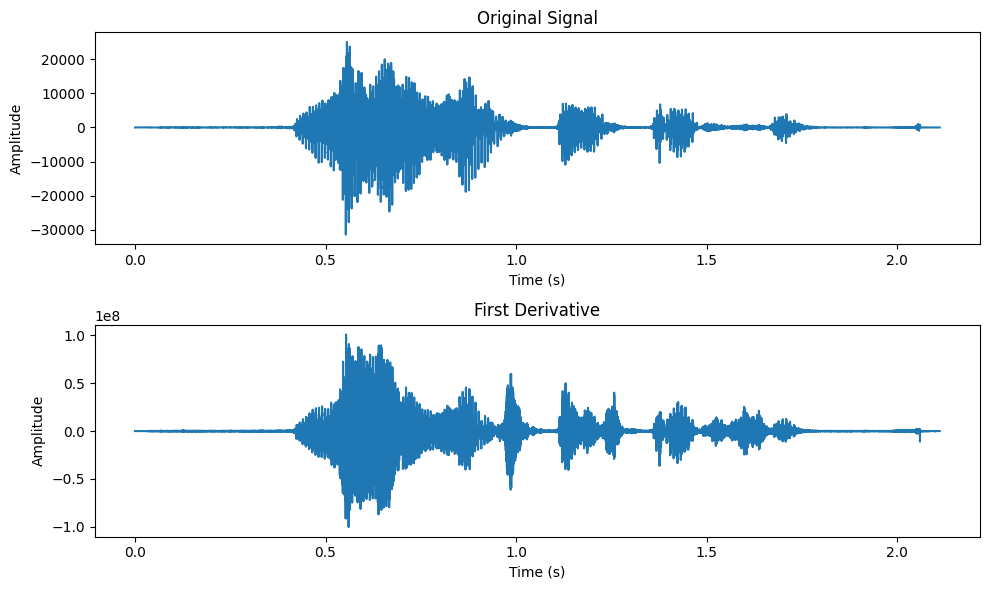

In [4]:
#A1
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Function to compute the first derivative using finite difference method
def finite_difference(signal, sampling_rate):
    dt = 1.0 / sampling_rate
    derivative = np.diff(signal) / dt
    return np.concatenate(([0], derivative))

# Load the WAV file
file_path = r'C:\Users\Admin\Downloads\Recording.wav'
sampling_rate, signal = wavfile.read(file_path)

# Compute the first derivative
derivative = finite_difference(signal, sampling_rate)

# Plot the original signal and its derivative
time = np.arange(0, len(signal)) / sampling_rate

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
time_derivative = np.arange(0, len(derivative)) / sampling_rate
plt.plot(time_derivative, derivative)
plt.title('First Derivative')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Average length between zero crossings for speech: 3.5577672003461704 samples
Average length between zero crossings for silence: 2.2513326226012795 samples


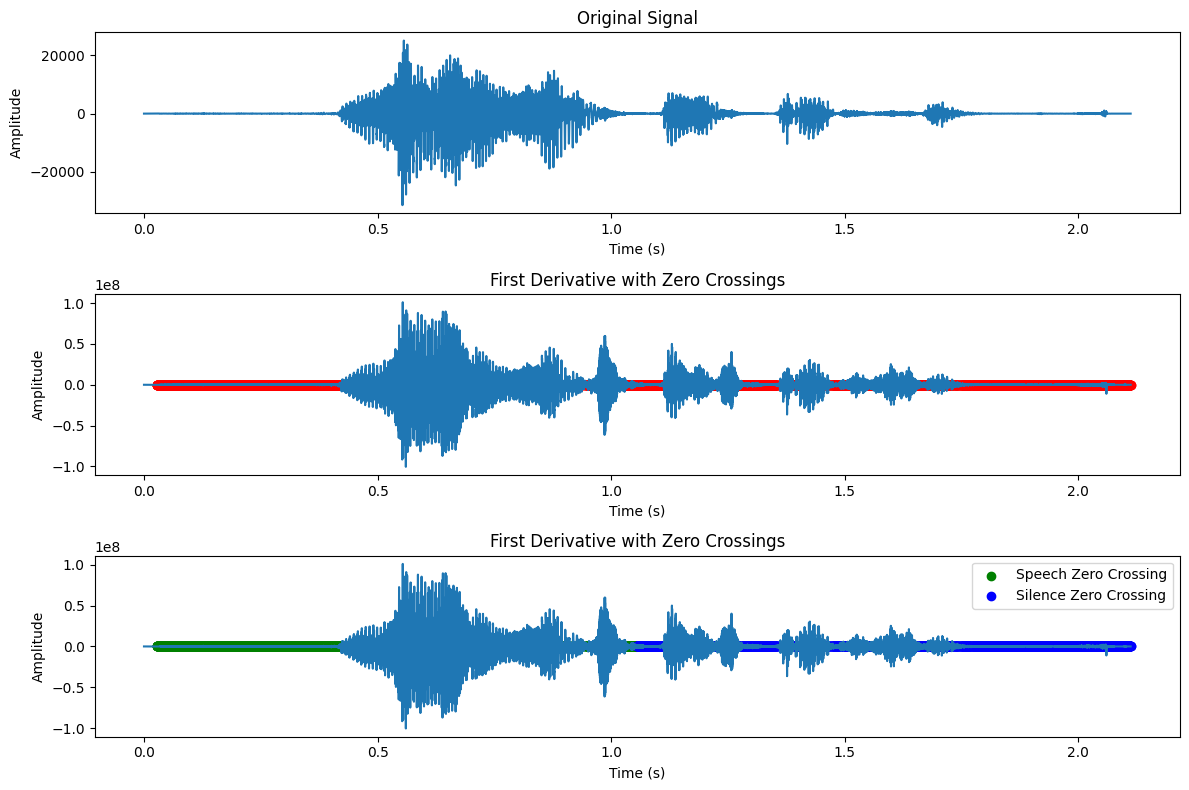

In [6]:
#A2
def finite_difference(signal, sampling_rate):
    dt = 1.0 / sampling_rate
    derivative = np.diff(signal) / dt
    return np.concatenate(([0], derivative))

def zero_crossings(derivative):
    return np.where(np.diff(np.sign(derivative)))[0]

def calculate_average_length(zero_crossings):
    return np.mean(np.diff(zero_crossings))

# Load the WAV file
file_path = r"C:\Users\Admin\Downloads\Recording.wav"
sampling_rate, signal = wavfile.read(file_path)

# Compute the first derivative
derivative = finite_difference(signal, sampling_rate)

# Detect zero crossings
zero_crossings_indices = zero_crossings(derivative)

# Plot the original signal and its derivative with zero crossings
time = np.arange(0, len(signal)) / sampling_rate

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
time_derivative = np.arange(0, len(derivative)) / sampling_rate
plt.plot(time_derivative, derivative)
plt.title('First Derivative with Zero Crossings')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.scatter(zero_crossings_indices / sampling_rate, np.zeros_like(zero_crossings_indices), color='red', marker='o', label='Zero Crossing')

# Calculate average length between zero crossings for speech and silence
speech_zero_crossings = zero_crossings_indices[zero_crossings_indices < len(signal) / 2]
silence_zero_crossings = zero_crossings_indices[zero_crossings_indices >= len(signal) / 2]

average_length_speech = calculate_average_length(speech_zero_crossings)
average_length_silence = calculate_average_length(silence_zero_crossings)

print(f"Average length between zero crossings for speech: {average_length_speech} samples")
print(f"Average length between zero crossings for silence: {average_length_silence} samples")

plt.subplot(3, 1, 3)
plt.plot(time_derivative, derivative)
plt.title('First Derivative with Zero Crossings')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.scatter(speech_zero_crossings / sampling_rate, np.zeros_like(speech_zero_crossings), color='green', marker='o', label='Speech Zero Crossing')
plt.scatter(silence_zero_crossings / sampling_rate, np.zeros_like(silence_zero_crossings), color='blue', marker='o', label='Silence Zero Crossing')
plt.legend()

plt.tight_layout()
plt.show()

The length Duration of first audio file: 8.909251700680272 seconds
The length Duration of Second audio file: 7.152063492063492 seconds


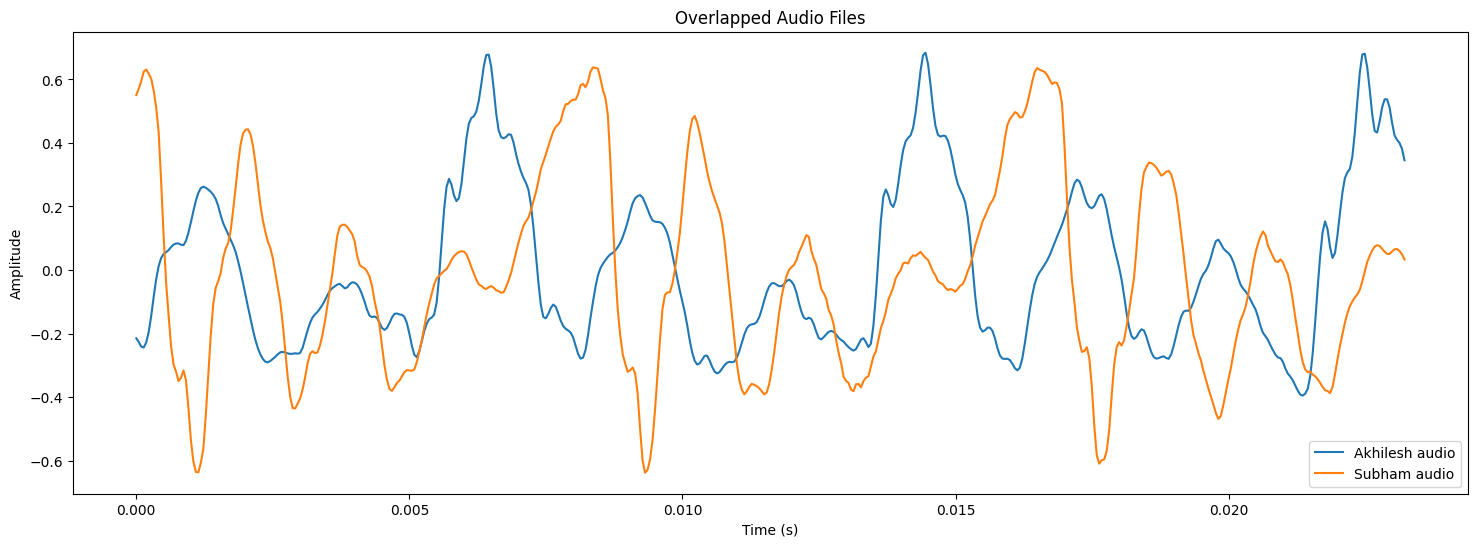

In [7]:
#A3
import librosa.display


audio_file1 = r"C:\Users\Admin\Downloads\akhilesh rec.wav"
audio_file2 = r"C:\Users\Admin\Downloads\subham rec.wav"


# Load audio signals
y1, sr1 = librosa.load(audio_file1)
y2, sr2 = librosa.load(audio_file2)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
audio_trimmed1 = remove_silence(y1, sr1)
audio_trimmed2 = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(audio_trimmed1) / sr1, len(audio_trimmed1))
time2 = np.linspace(0, len(audio_trimmed2) / sr2, len(audio_trimmed2))

# Plot the trimmed audio files
plt.figure(figsize=(18, 6))
plt.plot(time1, audio_trimmed1, label='Akhilesh audio')
plt.plot(time2, audio_trimmed2, label='Subham audio')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()

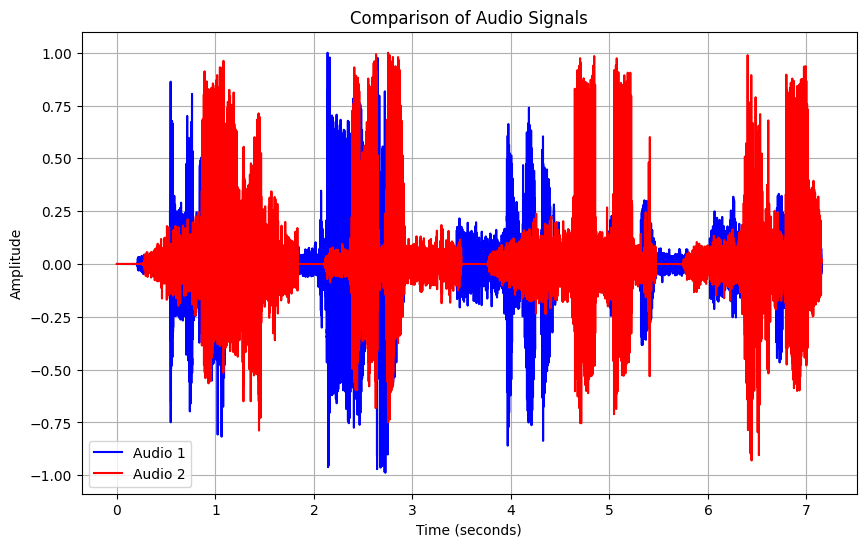

In [13]:
#A4
import librosa as lb
y1, sr = lb.load(r"C:\Users\Admin\Downloads\subham rec.wav")

# Load the second audio file
y2, sr = lb.load(r"C:\Users\Admin\Downloads\akhilesh rec.wav")

# Ensure both audio signals have the same length
min_length = min(len(y1), len(y2))
audio_data_1 = y1[:min_length]
audio_data_2 = y2[:min_length]

# Normalize audio data to be in the range [-1, 1]
yk1 = audio_data_1.astype(float) / np.max(np.abs(audio_data_1))
yk2 = audio_data_2.astype(float) / np.max(np.abs(audio_data_2))

# Create time axis for plotting
time_axis = np.arange(len(yk1)) / sr

# Plot both audio signals on the same graph
plt.figure(figsize=(10, 6))
plt.plot(time_axis, yk1, color='blue', label='Audio 1')
plt.plot(time_axis, yk2, color='red', label='Audio 2')
plt.title('Comparison of Audio Signals')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

